<a href="https://colab.research.google.com/github/tgresearch/DSA-Python/blob/main/DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : http://www.gisdeveloper.co.kr/?p=8615

- PyTorch의 Dataset과 DataLoader를 이용하면 학습을 위한 방대한 데이터를 미니배치 단위로 처리할 수 있고, 데이터를 무작위로 섞음으로써 학습의 효율성을 향상시킬 수 있다.  
- 또한 데이터를 여러개의 GPU를 사용해 병렬처리로 학습할 수도 있다. 

## DataLoader 미사용
아래의 코드는 Dataset과 DataLoader를 사용하지 않고 매 에폭마다 학습 데이터 전체를 입력해 학습하는 코드이다.

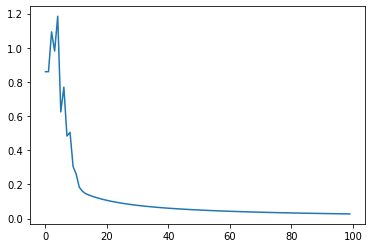

In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
from torch.utils.data import  TensorDataset, DataLoader
 
iris = load_iris()
 
X = iris.data[:100]
y = iris.target[:100]
 
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
 
net = nn.Linear(4, 1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.25)
 
losses = []
 
for epoc in range(100):
    batch_loss = 0.0
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    optimizer.step()
    batch_loss += loss.item()
    
    losses.append(batch_loss)
 
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()

# DataLoader 사용
다음 코드는 위의 코드에 대해서 Dataset과 DataLoader를 적용한 코드이다.   
앞 코드의 하이퍼 파라메터 등에 대한 모든 조건은 동일하고 단지 미니배치를 10로 하여 학습시킨다.

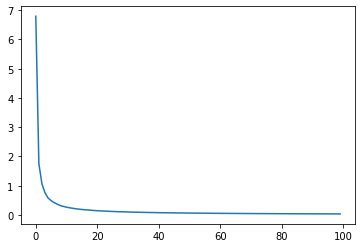

In [2]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
from torch.utils.data import  TensorDataset, DataLoader

iris = load_iris()

X = iris.data[:100]
y = iris.target[:100]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

ds = TensorDataset(X, y)
loader = DataLoader(ds, batch_size=10, shuffle=True)

net = nn.Linear(4, 1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.25)

losses = []

for epoc in range(100):
    batch_loss = 0.0
    for xx, yy in loader:
        optimizer.zero_grad()
        y_pred = net(xx)
        loss = loss_fn(y_pred.view_as(yy), yy)
        loss.backward()
        optimizer.step()
        batch_loss += loss.item()
    losses.append(batch_loss)

from matplotlib import pyplot as plt

plt.plot(losses)
plt.show()